In [31]:
import pandas as pd
import numpy as np
import re
import datetime

In [32]:
data = pd.read_csv("matala2_cosmetics_2019-Nov.csv")
data2 = pd.read_csv("matala2_cosmetics_2019-Nov1.csv")

<ipython-input-32-4435f34b8232>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("matala2_cosmetics_2019-Nov.csv")
<ipython-input-32-4435f34b8232>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("matala2_cosmetics_2019-Nov1.csv")


In [33]:
data2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [34]:
data2['event_time'] = data2['event_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))


In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          object        
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 318.3+ MB


<h2> q1

In [36]:
#x = dataset_try.sort_values('user_session')
data2.sort_values('user_session')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
522763,2019-11-05 07:57:05,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04
1443597,2019-11-11 12:15:10,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a
1933123,2019-11-15 03:50:03,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3
1662416,2019-11-13 04:37:37,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390
1800717,2019-11-14 04:00:28,view,5861619,1487580008246412266,NaN,lador,6.38,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e
...,...,...,...,...,...,...,...,...,...
4601243,2019-11-30 19:03:25,remove_from_cart,5754302,1487580009286598681,NaN,lianail,1.78,391748818,NaN
4601283,2019-11-30 19:03:36,remove_from_cart,5760335,1487580009261432856,NaN,zinger,1.9,391748818,NaN
4601318,2019-11-30 19:03:44,remove_from_cart,5694465,1487580008112194531,NaN,NaN,4.68,391748818,NaN
4601352,2019-11-30 19:03:56,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN


In [37]:

data2['duration_to_next_event'] = data2.groupby('user_session')['event_time'].diff(-1)

In [38]:
data2['duration_to_next_event'] = data2['duration_to_next_event'].dt.total_seconds().fillna(0)

In [39]:
data2['duration_to_next_event'] = np.abs(data2['duration_to_next_event'])

In [40]:
data2.iloc[np.where (data2['user_session']=='09fafd6c-6c99-46b1-834f-33527f4de241')]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
6,2019-11-01 00:00:25,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,25.0
12,2019-11-01 00:00:50,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,7.0
15,2019-11-01 00:00:57,view,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,167.0
53,2019-11-01 00:03:44,cart,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2.0
55,2019-11-01 00:03:46,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,8.0
56,2019-11-01 00:03:54,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,68.0
80,2019-11-01 00:05:02,view,5896424,1487580006300255120,NaN,jessnail,32.54,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0.0


<h1> q2 

In [41]:
train_data=data2.iloc[np.where((data2['user_id'] == 476617079) | (data2['user_id'] == 457678989))].sort_values(['user_id','event_time'])

In [42]:
funnel_lst=np.array([1])
def funnel(data2):
    if (data2['id_diff'] != 0):
        funnel_lst[0] = 1
    elif((data2['duration_in_days'] > 5) and (data2['id_diff'] == 0)):
        funnel_lst[0] += 1
    return funnel_lst[0]

In [43]:
data2=data2.sort_values(['user_id','event_time'])
data2['duration_in_days']=abs(data2[['event_time']].diff(1).event_time.dt.days.fillna(0))
data2['id_diff']=data2[['user_id']].diff(1).fillna(-1)#if diff= 0 same id 
data2['funnel_number'] = data2.apply(funnel,axis=1) 
data2=data2.drop(columns=['id_diff', 'duration_in_days'])

data2=data2.sort_values(['user_id','event_time'])
data2['duration_in_days']=abs(data2[['event_time']].diff(1).event_time.dt.days.fillna(0))
#data2['id_diff']=data2[['user_id']].diff(1).fillna(-1)#if diff= 0 same id
data2['bigger_than_5'] = data2['duration_in_days'].apply(lambda x: 1 if x>5 else 0)

In [44]:
data2.iloc[np.where((data2['user_id'] == 476617079) | (data2['user_id'] == 457678989))].sort_values(['user_id','event_time'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1


data2['funnel_number'] = data2.groupby('user_id')['bigger_than_5'].cumsum()+1

In [45]:
data2.iloc[np.where((data2['funnel_number'] == 0))]
#cheak if there any 0 valuse

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number


<h2> q3

In [46]:
def index_for_funnel(data2):
    data2['funnel_number_index'] = data2['funnel_number_index']/data2['funnel_number']
    return data2['funnel_number_index']

In [47]:

data2['funnel_number_index'] = data2.groupby(['user_id','funnel_number'])['funnel_number'].cumsum(axis = 0)
data2['funnel_number_index'] = data2.apply(index_for_funnel, axis = 1)

In [48]:
data2.iloc[np.where((data2['user_id'] == 476617079) | (data2['user_id'] == 457678989))].sort_values(['user_id','event_time'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,funnel_number_index
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1,1.0
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1,2.0
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1,3.0
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2,1.0
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,2.0
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1,1.0
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1,2.0
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1,3.0
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1,4.0
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1,5.0


<h2> q4

In [49]:
data2['price'] = data2['price'].replace('[^0-9.]', '', regex=True).astype(float)


In [50]:
data2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,funnel_number_index
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1.0
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1.0
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2.0
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3.0
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1,3.0
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1,4.0
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1,5.0
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1.0


<h2> q5

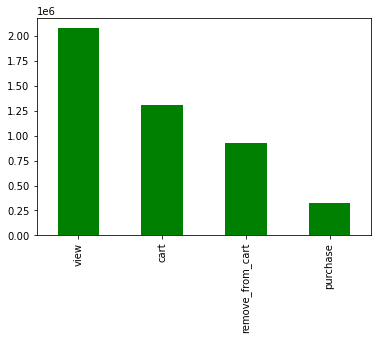

In [51]:
data2['event_type'].value_counts().plot(kind='bar',color = 'green');

<h2> q6

<h2> a,b,c,d,e

In [84]:
session_data = data2[['user_id','user_session','funnel_number','funnel_number_index']]

In [85]:
session_data['count_event'] = session_data.groupby('user_session')[['user_id']].transform('count')
session_data=session_data.drop_duplicates(subset=["user_session"])

<ipython-input-85-8904dcca515d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['count_event'] = session_data.groupby('user_session')[['user_id']].transform('count')


In [86]:
session_data

,user_id,user_session,funnel_number,funnel_number_index,count_event
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0
2741454,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31.0,1.0
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0
...,...,...,...,...,...
4635578,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0
4635655,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0
4635713,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0


<h2> f

In [87]:
data2 = data2.sort_values(["user_id",'user_session','event_time'])
session_data['tot_session_time'] = data2.groupby('user_session')['duration_to_next_event'].transform('sum')


In [88]:
#session_data = data2[['user_id','user_session','funnel_number','funnel_number_index','count_event','tot_session_time']]
session_data=session_data.drop_duplicates(subset=["user_session"])
session_data

,user_id,user_session,funnel_number,funnel_number_index,count_event,tot_session_time
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0,0.0
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0,0.0
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0,3789.0
2741454,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31.0,1.0,0.0
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0,0.0
...,...,...,...,...,...,...
4635578,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0,0.0
4635655,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0,0.0
4635713,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0,38.0
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0,0.0


<h2> g

In [89]:
#session_data= data2[['user_id','user_session']]
#session_data= session_data.drop_duplicates(subset=["user_session"])
data2_view = data2[data2['event_type']=='view']
data2_v = data2_view.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
data2_v.columns = ['user_session','list_of_viewed']
session_data = session_data.merge(data2_v,how='left', on='user_session').fillna("[ ]")



In [90]:
session_data

,user_id,user_session,funnel_number,funnel_number_index,count_event,tot_session_time,list_of_viewed
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0,0.0,[5240]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0,0.0,[5814066]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ..."
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31.0,1.0,0.0,[5711087]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0,0.0,[5711145]
...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0,0.0,[5881428]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0,0.0,[5873630]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]"
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0,0.0,[5790563]


<h2> i

In [91]:
data2_cart = data2[data2['event_type']=='cart']
data2_c = data2_cart.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
data2_c.columns = ['user_session','list_of_cart']
session_data = session_data.merge(data2_c,how='left', on='user_session').fillna("[ ]")

In [92]:
session_data

,user_id,user_session,funnel_number,funnel_number_index,count_event,tot_session_time,list_of_viewed,list_of_cart
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0,0.0,[5240],[ ]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0,0.0,[5814066],[ ]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[ ]
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31.0,1.0,0.0,[5711087],[ ]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0,0.0,[5711145],[ ]
...,...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0,0.0,[5881428],[ ]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0,0.0,[5873630],[ ]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",[ ]
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0,0.0,[5790563],[ ]


<h2> h

In [93]:
data2_purchase = data2[data2['event_type']=='purchase']
data2_p = data2_purchase.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
data2_p.columns = ['user_session','list_of_purchase']
session_data = session_data.merge(data2_p,how='left', on='user_session').fillna("[ ]")

In [94]:
session_data

,user_id,user_session,funnel_number,funnel_number_index,count_event,tot_session_time,list_of_viewed,list_of_cart,list_of_purchase
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0,0.0,[5240],[ ],[ ]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0,0.0,[5814066],[ ],[ ]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[ ],[ ]
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31.0,1.0,0.0,[5711087],[ ],[ ]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0,0.0,[5711145],[ ],[ ]
...,...,...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0,0.0,[5881428],[ ],[ ]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0,0.0,[5873630],[ ],[ ]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",[ ],[ ]
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0,0.0,[5790563],[ ],[ ]


In [95]:
#cheak that i get list with valuse in cart and purchase
session_data.iloc[np.where((session_data['user_session'] == 'e6c265d5-f607-4221-a591-8d03c96878db'))]
data2.iloc[np.where((data2['event_type'] == 'purchase'))]
session_data.iloc[np.where((session_data['user_session'] == '129dfa88-8785-4342-9666-eca5683020e3'))]

,user_id,user_session,funnel_number,funnel_number_index,count_event,tot_session_time,list_of_viewed,list_of_cart,list_of_purchase
190407,476617079,e6c265d5-f607-4221-a591-8d03c96878db,1,1.0,18.0,2366682.0,"[5843546, 5768981, 5560754]","[5587660, 5697534, 5587656, 5587544, 5838759, ...",[ ]
